<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Sebastián Andrés Bustos Vásquez</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

Link repositorio de github : "https://github.com/sebabustos2001/EIE401---Procesamiento-Digital-Multimedia"

## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>


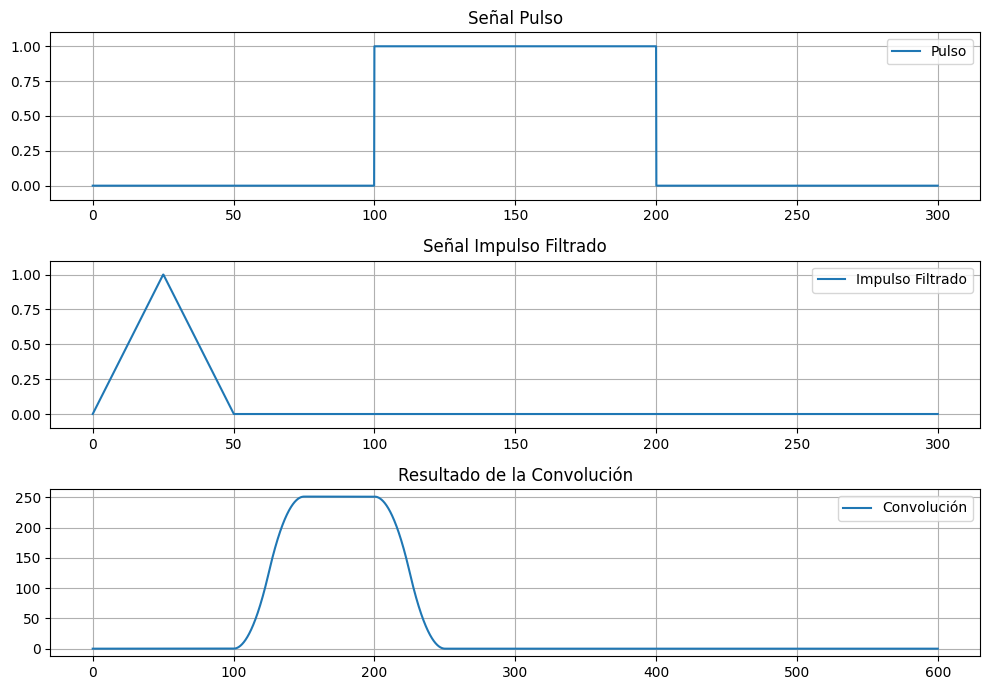

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Utilice una senal pulso que comienza en 100 ms y termina en 200 ms, con ventana de 0 a 300 ms,
# pensando que el eje x de la imagen está en milisegundos.

t = np.linspace(0, 300, 3001)                       # 3001 puntos para tener una resolucion de 0.1 ms
pulso = np.where((t >= 100) & (t <= 200), 1, 0)     # 

# Señal de impulso filtrada, utilicé un impulso triangular, puede que altere un poco el resultado. 
# comienza en 0 y termina en 50 ms.

impulso = np.concatenate((np.linspace(0, 1, 251), np.linspace(1, 0, 251)), axis=0)
impulso = np.pad(impulso, (0, 3001-len(impulso)), 'constant', constant_values=(0, 0))

# Convolución con la libreria scipy
resultado_convolucion = convolve(pulso, impulso, mode='full')

# Eje de tiempo para la convolucion.
t_convolucion = np.linspace(0, t[-1]*2, len(resultado_convolucion))

# Graficar
fig, axes = plt.subplots(3, 1, figsize=(10, 7))

# Señal Pulso
axes[0].plot(t, pulso, label='Pulso')
axes[0].set_title('Señal Pulso')
axes[0].set_ylim(-0.1, 1.1)
axes[0].grid(True)

# Señal Impulso
axes[1].plot(t, impulso[:len(t)], label='Impulso Filtrado')
axes[1].set_title('Señal Impulso Filtrado')
axes[1].set_ylim(-0.1, 1.1)
axes[1].grid(True)

# Convolución
axes[2].plot(t_convolucion, resultado_convolucion, label='Convolución')
axes[2].set_title('Resultado de la Convolución')
axes[2].grid(True)

# Mostrar las gráficas
for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()

## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


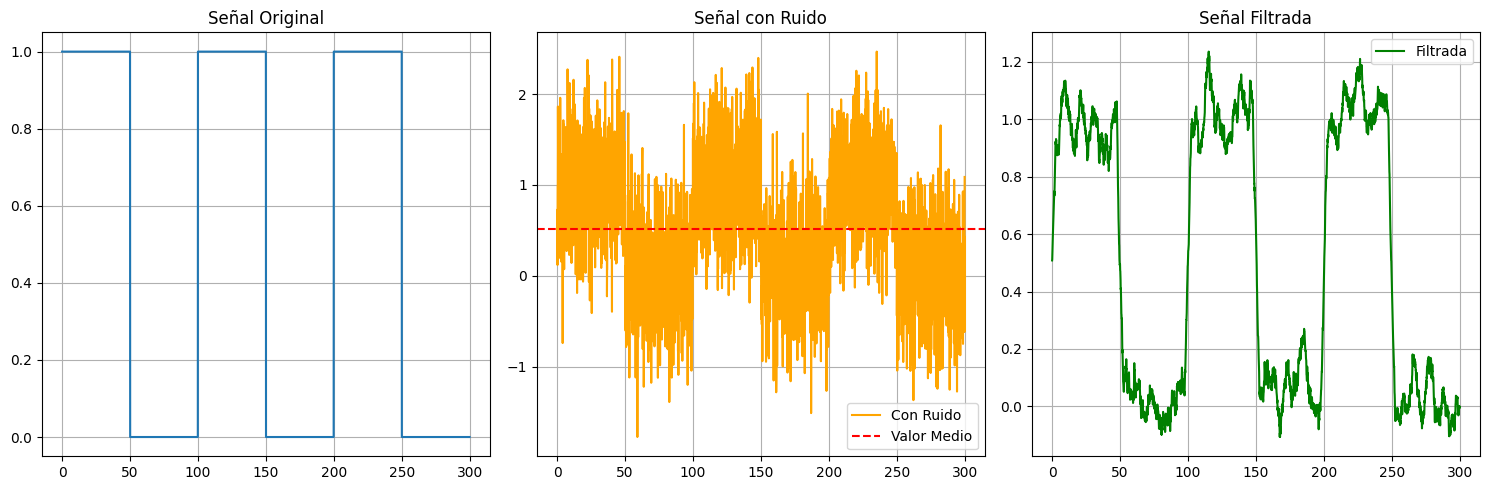

0.5198541086046771

In [4]:
# Definir senal original como una senal pulsada que se repite tres veces
def crear_pulso_repetido(t, repeticiones, duracion_pulso, periodo):
    pulso = np.zeros_like(t)
    for i in range(repeticiones):
        inicio = i * periodo
        fin = inicio + duracion_pulso
        pulso += np.where((t >= inicio) & (t <= fin), 1, 0)
    return pulso

# Parametros de la señal
repeticiones = 3
duracion_pulso = 50  # milisegundos
periodo = 100  # milisegundos
t_total = repeticiones * periodo  # duracion total de la senal en milisegundos

# Crear la senal original
t = np.linspace(0, t_total, t_total*10 + 1)  # 10 puntos por milisegundo
senal_original = crear_pulso_repetido(t, repeticiones, duracion_pulso, periodo)

# Agregar ruido blanco a la senal
nivel_ruido = 0.5  # nivel del ruido
senal_con_ruido = senal_original + np.random.normal(0, nivel_ruido, size=senal_original.shape)

# Obtener el valor medio de la senal con ruido
valor_medio = np.mean(senal_con_ruido)

# Aplicacion de filtro con funcion media movil
def filtro_media_movil(signal, ventana):
    return np.convolve(signal, np.ones(ventana)/ventana, mode='same')

ventana_filtrado = 50  # tamano de la ventana para el filtro de media movil
senal_filtrada = filtro_media_movil(senal_con_ruido, ventana_filtrado)

plt.figure(figsize=(15, 5))

# Grafica senal original
plt.subplot(1, 3, 1)
plt.plot(t, senal_original, label='Original')
plt.title('Señal Original')
plt.grid(True)

# Grafica senal con ruido
plt.subplot(1, 3, 2)
plt.plot(t, senal_con_ruido, label='Con Ruido', color='orange')
plt.title('Señal con Ruido')
plt.axhline(y=valor_medio, color='r', linestyle='--', label='Valor Medio')
plt.legend()
plt.grid(True)

# Grafica senal filtrada
plt.subplot(1, 3, 3)
plt.plot(t, senal_filtrada, label='Filtrada', color='green')
plt.title('Señal Filtrada')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Devolver el valor medio de la señal con ruido
valor_medio

## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


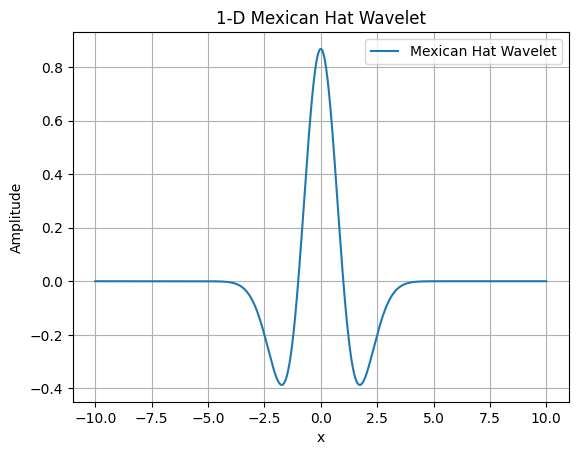

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
    # x = rango de valores a evaluar en la funcion.
    # mu = valor medio de x, centro de la wavelet.
    # sigma = desviacion estandar de la wavelet, controla el ancho de la función
    # return = valores de la funcion evaluados en x
    
    factor_normalizacion = 2 / (np.sqrt(3 * sigma) * (np.pi ** 0.25))
    term1 = (1 - ((x - mu) ** 2) / (sigma ** 2))
    term2 = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    return factor_normalizacion * term1 * term2

# Rango de valores de x a evaluar en la funcion
x = np.linspace(-10, 10, 1000)
mu = 0              # Centro de la funcion
sigma = 1.0         # Valor de sigma para la funcion

# Calcular valores de la funcion
valores_wavelet = mexican_hat(x, mu, sigma)

# Grafica
plt.plot(x, valores_wavelet, label='Mexican Hat Wavelet')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('1-D Mexican Hat Wavelet')
plt.legend()
plt.grid(True)
plt.show()

### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$. 

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

###  3.2.1. Explica el siguiente fragmento de código en detalle

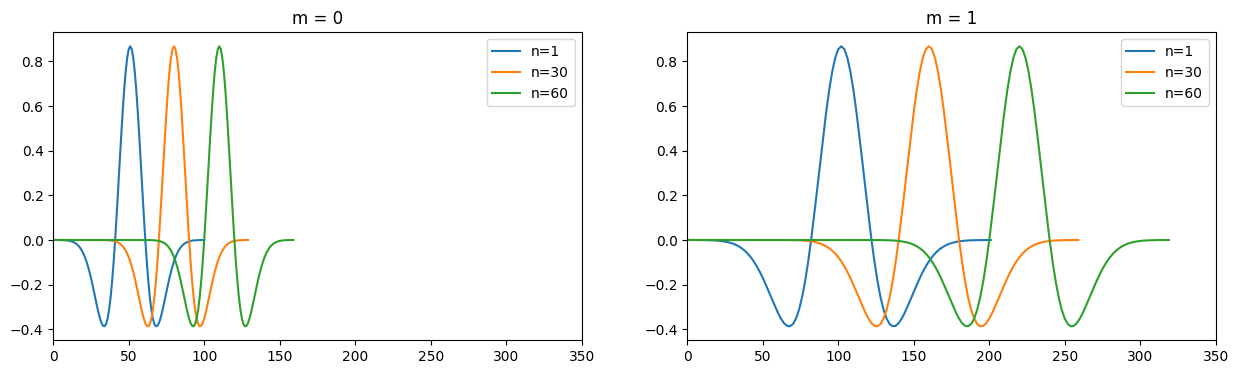

In [7]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet

def psi_mn(psi, m, n):      # se define la funcion psi_mn que toma argumentos para wavelet psi:
    a = 2**m                # dos enteros m y n, que son los indices de escala y traslacion
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)      # arreglo de ceros para almacenar la wavelet escalada y trasladada. Su longitud es el producto psi con a, más b.
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi) # np.interp interpola la senal original psi al nuevo arreglo ajustado por el factor a estirado por b
    return wav

psi = mexican_hat(np.arange(-5,5,0.1),0,1)  # crea la wavelet de sombrero mexicano, se especifica el rango de valores, la media, desviacion estandar y paso entre cada valor, respectivamente
xlim = (0,350)                  # valores para la visualizacion grafica
ns = [1, 30, 60]
ms = [0, 1]
plt.figure(figsize=(15,4))      # graficar la funcion
plt.subplot(121)

for mi in range(len(ms)):       # serie de subgraficas basadas en la longitud de ms
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1) 
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))  # grafica de varias wavelets escaladas
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()

### 3.2.2 completa el siguiente código para realizar la transformada


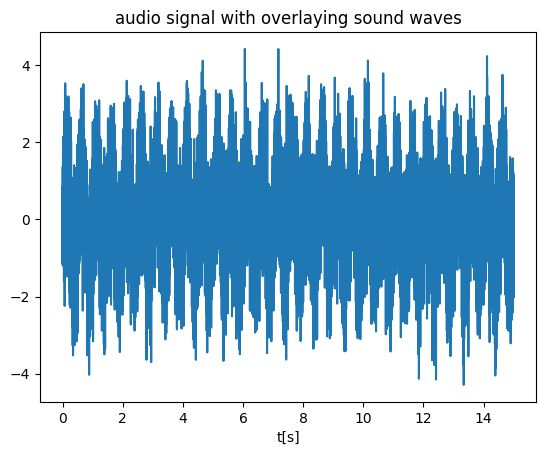

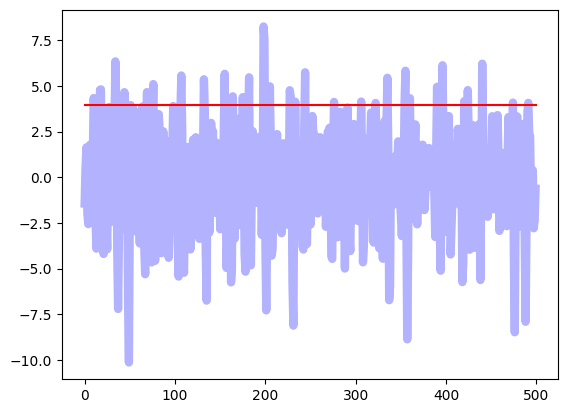

In [19]:

"""Transformed considering the sum over the section under study"""
def twav_mn(f, psi, m, n):
    # Calcular parametros de escala y traslación
    a = 2**(-m)
    b = n * 2**m
    
    # Ajustar wavelet de acuerdo a 'm' y 'n'
    psi_scaled = psi / np.sqrt(a)

    # Encontrar el rango de indices para aplicar la wavelet
    start = int(b)
    end = start + int(len(psi_scaled))
    if end > len(f):
        end = len(f)
        psi_scaled = psi_scaled[:end-start]

    # Realizar la suma sobre la senal
    transform_scaled = np.sqrt(a) * np.sum(f[start:end] * psi_scaled)
    return transform_scaled
"""Naive Transform adding over the whole length"""

def twav_mn_naive(f, psi, m, n):
    # Calcular parametros de escala y traslación
    a = 2**(-m)
    b = n * 2**m

    # Ajustar la wavelet de acuerdo a 'm' y 'n'
    psi_scaled = psi / np.sqrt(a)

    # Realizar la suma sobre la wavelet entera y el principio de la senal
    transform = np.sqrt(a) * np.sum(f[:len(psi_scaled)] * psi_scaled)
    return transform

psi = mexican_hat(np.arange(-5,5,0.1),0,1)  # crea la wavelet de sombrero mexicano, se especifica el rango de valores, la media, desviacion estandar y paso entre cada valor, respectivamente

m = 3 #single value for m
n = 1
ns = np.arange(1000,1500)
res=1000 #resolution
freq=2 #frequency
"""Creating a wave to analyse"""
x = np.arange(0,15000,1) # Produces [0, 100) with steps of 2.
noise = np.random.normal(0,1, len(x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
#adding noise
audio=np.sin(np.arange(15000)*2*np.pi*freq/res)+noise


transformed_sweept=[twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept=[twav_mn_naive(audio, psi, m, n) for n in ns]

plt.plot(np.arange(len(audio),dtype="float32")/res,audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.show()



plt.plot(transformed_sweept,color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()

### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño. 

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia. 
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

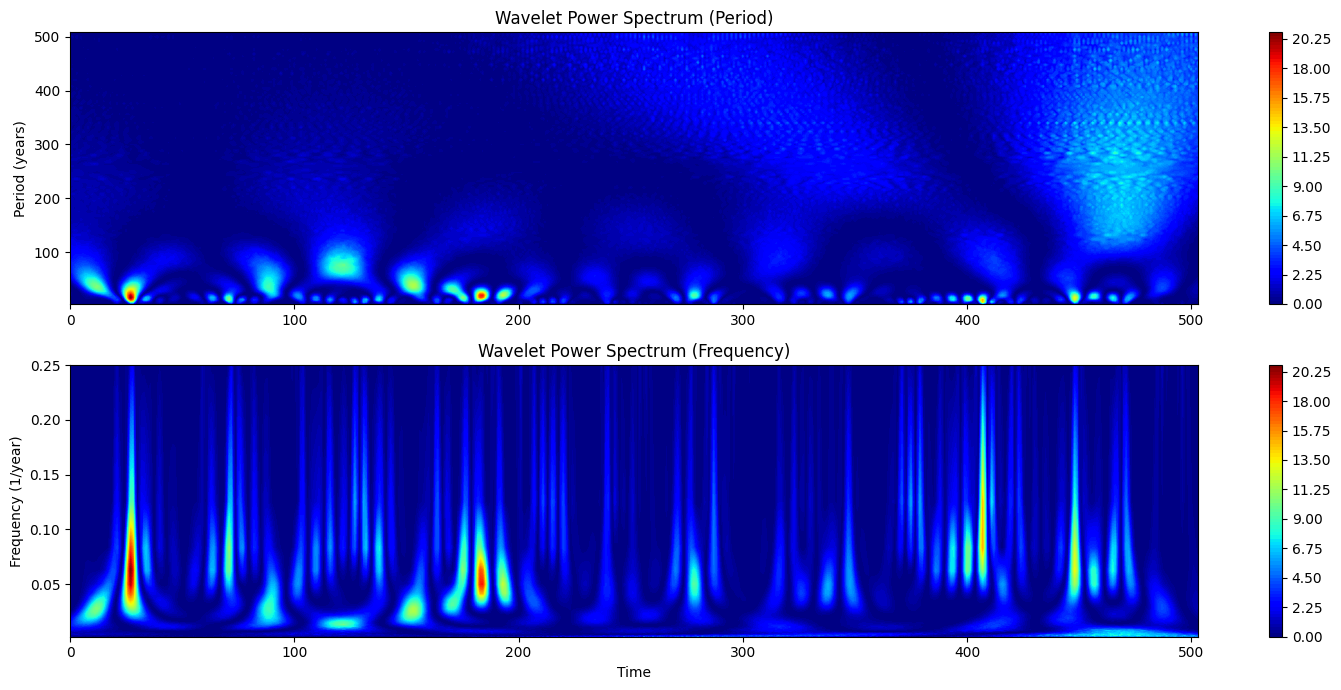

In [13]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

url = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"

# Descargar datos con pandas
nino_data = pd.read_csv(url, header=None).values.flatten()

# Aplicar Transformada Wavelet Continua
widths = np.arange(1, 128)
cwtmatr, freqs = pywt.cwt(nino_data, widths, 'mexh')

# Convertir coeficientes a potencia (cuadrado de la magnitud)
power = (cwtmatr ** 2)

# Graficar potencia vs periodo
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.contourf(np.arange(len(nino_data)), 1 / freqs, power, 100, cmap='jet')
plt.colorbar()
plt.ylabel('Period (years)')
plt.title('Wavelet Power Spectrum (Period)')

# Graficar potencia vs frecuencia
plt.subplot(212)
plt.contourf(np.arange(len(nino_data)), freqs, power, 100, cmap='jet')
plt.colorbar()
plt.ylabel('Frequency (1/year)')
plt.xlabel('Time')
plt.title('Wavelet Power Spectrum (Frequency)')

plt.tight_layout()
plt.show()


### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

Los gráficos muestran cómo la intensidad del fenómeno varía a lo largo del tiempo y en diferentes escalas de tiempo. Estas variaciones pueden estar relacionadas con los ciclos naturales de las temperaturas oceánicas y atmosféricas.

En el gráfico de periodo, las áreas más intensas indican una mayor potencia y, por lo tanto, una mayor intensidad o actividad del fenómeno de El Niño en frecuencias específicas. Es particularmente útil para identificar con qué frecuencia se presentan las anomalías de temperatura que están asociadas con el fenómeno.

El segundo gráfico representa la frecuencia, directamente proporcional a la frecuencia de ocurrencia del evento. Las frecuencias más altas están en la parte inferior y las más bajas en la parte superior. Las trazas verticales de colores cálidos son períodos durante los cuales el fenómeno fue más intenso.



## 4. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/